In [12]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# Aplanar los datos anidados
df = pd.json_normalize(data)

# Mostrar las primeras filas para ver cómo quedó
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

#📌 Extracción

In [13]:
# 📌 Extracción
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# Aplanar datos anidados
df = pd.json_normalize(data)

print("Datos cargados y aplanados:")
print(df.head())

Datos cargados y aplanados:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  in

#🔧 Transformación

In [14]:
# 🔧 Transformación

# Revisar columnas y tipos de datos
print("Información del DataFrame:")
print(df.info())

# Crear grupo según tenure (tiempo con el servicio)
df['grupo_tenure'] = pd.cut(df['customer.tenure'], bins=[0, 12, 24, 48, 100], labels=['Nuevo', 'Intermedio', 'Experto', 'Veterano'])

print("Primeras filas con grupo tenure:")
print(df[['customer.tenure', 'grupo_tenure']].head())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport 

#📊 Carga y análisis

Clientes por tipo de servicio de internet:
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


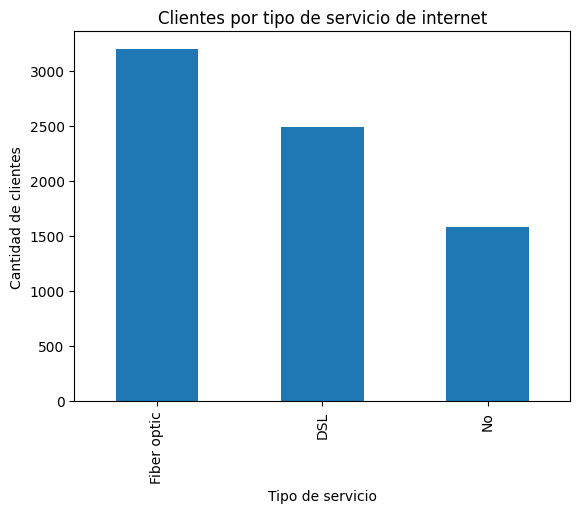

Conteo de Churn (evasión):
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


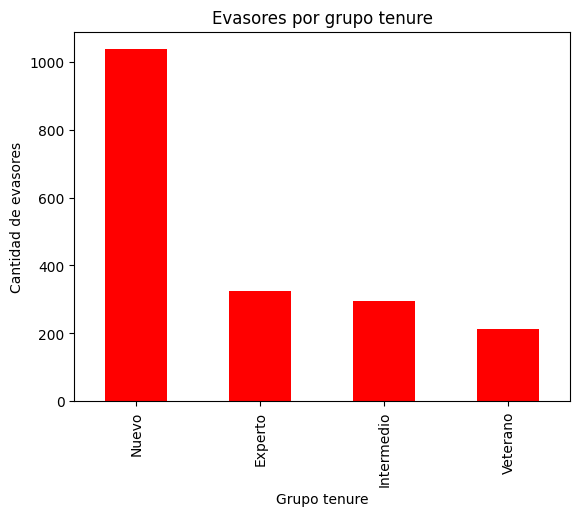

In [15]:
# 📊 Carga y análisis
import matplotlib.pyplot as plt

# Conteo de clientes por tipo de servicio de internet
print("Clientes por tipo de servicio de internet:")
print(df['internet.InternetService'].value_counts())

# Gráfico de barras
df['internet.InternetService'].value_counts().plot(kind='bar')
plt.title('Clientes por tipo de servicio de internet')
plt.xlabel('Tipo de servicio')
plt.ylabel('Cantidad de clientes')
plt.show()

# Análisis de evasión (Churn)
print("Conteo de Churn (evasión):")
print(df['Churn'].value_counts())

# Evasión por grupo tenure
evasores = df[df['Churn'] == 'Yes']
evasores['grupo_tenure'].value_counts().plot(kind='bar', color='red')
plt.title('Evasores por grupo tenure')
plt.xlabel('Grupo tenure')
plt.ylabel('Cantidad de evasores')
plt.show()


# 📄 Informe final  
  
- Se cargaron y aplanaron los datos de clientes de TelecomX.  
- Se creó un grupo de clientes según el tiempo que llevan con el servicio (tenure).  
- La mayoría de los clientes usan el servicio de internet X (según el gráfico).  
- Se observó la cantidad de clientes que han dejado el servicio (Churn).  
- La evasión se concentra en ciertos grupos de tenure, lo que puede ayudar a enfocar estrategias de retención.